# **Assignment 1: Descriptive statistics and cell morphology**

### **How to complete and submit this assignment**

**If you haven't already, make a copy of this notebook to your google drive:** 


> Select File &rarr; Save a Copy in Drive. 
> A new notebook with the title "Copy of Assignment 1" should open - and you can start working on this assignment!
<br>

**If you haven't already, download the data file and upload it to this notebook**

> Visit the Github homepage for this course, select the "Data-Analysis Assignments" folder -> then select "Assignment 1" and the file "cell_data_human_layer3_fullmorph.csv". Download this file by clicking on the dowbnload icon in the top right corner
> Next, upload to this notebook by selecting the folder icon on the left, clicking the upload arrow icon and choosing the file you just downloaded to your computer. 

Read all text in this notebook carefully as you progress through it. Whenever you see text under the heading "**task**", this means you are required to perform some action (e.g., run or modify some code, or provide a written response to a question by editing a Markdown cell). Whenever you are required to write some of your own code, you will see three dots ("..."). Delete these dots and enter your code. **The assignment is worth 90 points total.** Look for the number of points each task is worth in parantheses.
<br>
<br>
**When you are finished, select file &rarr; print and save the notebook as a PDF. You will then upload this PDF to Canvas as your Assignment!**




### **Background**

In this assignment, you are a researcher who specializes in studying the Morphology (i.e., the physical structure) of neurons. 

**The Data:** Scientists at the Allen Institute have just sent you a dataset that contains morphological properties for a set of neurons that were taken from layer 3 of the human medial temporal gyrus - a region that is thought to be crrucial for both language processing and memory formation. The dataset contains two different types of neurons:
<br>
(1) neurons that are excitatory (they excite their postsynaptic targets)
<br>
(2) neurons that are inhibitory (they inhibit their postsynaptic targets). 
<br>
Recall from our lecture on cell types that this distinction is what defines different **classes** of neurons.
<br>
<br>
**The Research Question:** Your goal is to use descriptive statistics to answer the question: **For human layer 3 MTG neurons in the sample data, how does neuronal morphology differ depending on whether neurons are *excitatory* or *inhibitory*?**
<br>
<br>
**Note:** Excitatory neurons typically have a lot of spines on their dendrites, and in this dataset they are referred to as ***spiny neurons***. The role of spines is complex, but importantly, they are often the site of the excitatory input synapses. On the other hand, inhibitory neurons have far fewer or no spines on their dendrites, giving them a smooth appearance. Inhibitory neurons are thus referred to as ***aspiny neurons*** in this dataset.
<br>
<br>
**The Variables:** You will be examining two different morphological variables:
<br>
1. The *maximum distance* that a neuron's axon or dendrite extends away from its soma
2. The *number of bifurcations* - i.e., the number of times a neuron's axon/dendrite branches into two


> **Task [10 points]:** Answer the following questions by writing your response in the markdown cell below this one (where it says "write your response here").
<br>
> 1. We are working with a sample data. What is the population?
> 2. What kind of variables are you working with (continuous or categorical)? How do you know?
> 3. Textbooks originally classified neurons as being bipolar, unipolar and multipolar cells, based on their overall shape. However, look at the image of the two neurons below. Why is this original classification not a detailed enough characterization of morphology for most scientific purposes? How do the two morphological variables being studied in this current dataset allow for a more systematic classification of neuronal morphology? 

![][image1]

[image1]: <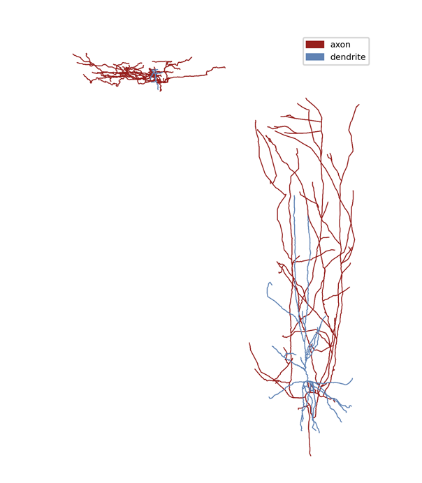>



**[write your response here]**
<br>
delete this text and write your response in its place... 



### **Structure of Assignment**

We'll be utilizing concepts we have learned together through 
- __[Statistics 1 - Frequency tables, distributions, & graphs](https://colab.research.google.com/github/Kar1na2/NEURO201/blob/main/In-class%20Activities/Statistics%201%20-%20Frequency%20tables%2C%20distributions%2C%20%26%20graphs.ipynb)__
- __[Statistics 2 - Measures of central tendency and dispersion-checkpoint](https://colab.research.google.com/github/Kar1na2/NEURO201/blob/main/In-class%20Activities/Statistics%202%20-%20Measures%20of%20central%20tendency%20and%20dispersion-checkpoint.ipynb)__


## **Part 1: Set up coding enviornment**

The Allen Institute has created a set of code and tools called a Software Development Kit (SDK). These tools will help us import and analyze the cell types data.
<br>

**Install and import common packages** 
<br>

> **Task [0 points]:** We also need to make sure that our coding enviornment has __[NumPy](https://numpy.org/)__, __[Pandas](https://pandas.pydata.org/)__, and __[Matplotlib](https://matplotlib.org/)__ already installed. Run the cell below -- any pacakages that are missing will be installed for you

In [2]:
# this will ensure that NumPy, Pandas, and Matplotlib are installed.

# Import our plotting package from matplotlib
import matplotlib.pyplot as plt

# Specify that all plots will happen inline & in high resolution
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import pandas for working with databases
import pandas as pd 

# Import numpy below
import numpy as np

# Add your print() statement below
print('Packages imported!')


Packages imported!


## **Part 2: Morphology of single cells** 

Now that we’ve imported all the tools needed, let’s get down to business! Let’s use the AllenSDK to visually inspect the morphology of a spiny neuron and an aspiny neuron. 
<br>

**Visit the Cell Types Database to get cell IDs** 
<br>

Start by visiting the __[Allen Cell Types Database Search](https://celltypes.brain-map.org/data)__ to access the searchable interface (as you did in lecture). You should see the following panel.
<br>

![][image1]

[image1]: <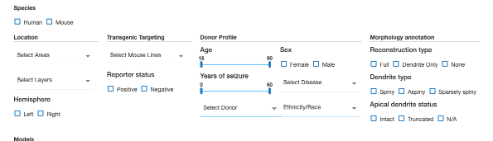>

<br>
As you might expect, the morphology of a neuron varies greatly across model organisms (e.g., human vs. mouse), brain region, and cortical layer. Remember, we're interested in a very specific question that relates to morphological differences between spiny/aspiny neurons in layer 3 of the human medial temporal gyrus (MTG). So let’s filter our search. 
<br>

Select **Human** neurons in **layer 3** of the **MTG**. Also select "**Full**" under "Reconstruction type" to ensure we only list neurons within the database that have a morphological reconstruction. You should see that the filtered criteria have left us with a dataset of 53 neurons (scroll down below the panel to see the results).
<br>
Select one spiny and one aspiny neuron and inspect their morphology, taking note of the amount you see branching of dendrites/axons, and the overall length of these branches. 
<br>



> **Task [20 points]:** Describe the morphologies (the overall shape and structure) of your spiny and aspiny neurons, taking note of how they extend along the X,Y, and Z axis!  How do they compare with one another in terms of the maximum distance they span and in terms of the number of visible branches? Write your answer to the above questions by editing the markdown cell below.

**Write your answer here (100 - 150 words):**


## **Part 3: Morphology of many cells (using descriptive stats)**

Now that we’ve examined single neurons, let’s consider all 53 spiny and aspiny neurons from layer 3 of the human MTG in the Allen Cell-Types database. We will examine two morphological features:

1. The maximum distance of an axon or dendrite from the soma
2. The number of bifurcations (branches) a neuron has

To summarize each feature across many neurons, we'll use the descriptive statistical techniques sthat you've learnt in lecture to calculate measures of central tendency and dispersion.

##### **📂 Load and inspect the dataset**

Let's begin by loading the dataset for those 53 neurons (all neurons in **layer 3** of the **human MTG** with **full morphological reconstruction**). This information is contained in a file called 
```
cell_data_human_MTG_layer3_fullmorph.csv
```
Let's assign the data to a variable called "df" (short for data frame).

> **Task [0 points]:** Run the code cell below to view the shape of the data.

In [4]:
# Load the dataset
df = pd.read_csv("cell_data_human_MTG_layer3_fullmorph.csv")

# Add code here to display the shape and see how many rows and columns we have 
print(f"Dataset shape: {df.shape}")

Dataset shape: (53, 11)


As you can see, our dataset contains 53 rows (corresponding to the 53 different neurons), and 11 columns. To see what the columns correspond to, let's examine the first 20 rows of the table.

> **Task [2 points]:** In the code block below, write code to display the first 20 rows of the data. Hint: Look at __["Step 2: View the first 20 rows" in Statistics 1 notebook](https://colab.research.google.com/github/Kar1na2/NEURO201/blob/main/In-class%20Activities/Statistics%201%20-%20Frequency%20tables%2C%20distributions%2C%20%26%20graphs.ipynb#scrollTo=_Step_2_View_the_First_20_Rows)__ notebook.

In [5]:
# Display the first 20 rows 
df.head(20)

,structure__name,structure__acronym,structure__layer,nr__max_euclidean_distance,nr__number_bifurcations,tag__dendrite_type,donor__age,donor__sex,donor__disease_state,donor__race,donor__species
0,middle temporal gyrus,MTG,3,504.253733,51,spiny,39 yrs,Male,epilepsy,White or Caucasian,Homo Sapiens
1,middle temporal gyrus,MTG,3,420.959982,22,aspiny,67 yrs,Male,epilepsy,White or Caucasian,Homo Sapiens
2,middle temporal gyrus,MTG,3,199.731730,13,aspiny,38 yrs,Female,epilepsy,unknown,Homo Sapiens
3,middle temporal gyrus,MTG,3,920.278293,34,spiny,48 yrs,Female,epilepsy,unknown,Homo Sapiens
4,middle temporal gyrus,MTG,3,565.339156,34,spiny,37 yrs,Male,epilepsy,White or Caucasian,Homo Sapiens
5,middle temporal gyrus,MTG,3,350.406255,13,aspiny,35 yrs,Male,epilepsy,unknown,Homo Sapiens
6,middle temporal gyrus,MTG,3,324.454164,16,aspiny,34 yrs,Female,epilepsy,Black or African American,Homo Sapiens
7,middle temporal gyrus,MTG,3,808.965139,78,spiny,67 yrs,Male,epilepsy,White or Caucasian,Homo Sapiens
8,middle temporal gyrus,MTG,3,528.139695,31,spiny,24 yrs,Female,epilepsy,Hispanic,Homo Sapiens
9,middle temporal gyrus,MTG,3,497.356189,5,aspiny,24 yrs,Female,epilepsy,White or Caucasian,Homo Sapiens


As we can see, each column contains a different piece of information about the neuron in a given row. Here are some important columns for our analysis: 

- The 6th column indicates whether a given neuron is spiny or aspiny
- The 4th column with heading **nr_max_euclidean_distance** indicates the maximum distance of an axon/dendrite from the soma.
- The 5th column with the heading **nr_number_bifurcations** indicates the number of times an axon or dendrite bifurcates.

### **Variable 1: Max distance from soma**

Let's now examine how excitatory (spiny) and inhibitory (aspiny) neurons differ in terms of one morphological feature: the max distance from the soma.

##### **📊 Plot histogram of the distribution of maximum distances from soma**

First let’s examine the maximum distance of neurons’ axons/dendrites from soma. Below, let's plot two different histograms on the same figure: one for spiny neurons (in blue), and another from aspiny neurons (in red). 

> **Task [3 points]:** Before running the code block below, where it says "Give your graph a title and axes labels", delete the "..." and write some code that adds labels the x-axis of your plot as “Distance”, the y-axis as “Number of neurons”, and give your plot an a descriptive title. To remind yourself of the python commands for doing this, refer to the previous histogram plots we made in __[“Step 5: Vary the bin size” in Statistics 1 notebook](https://colab.research.google.com/github/Kar1na2/NEURO201/blob/main/In-class%20Activities/Statistics%201%20-%20Frequency%20tables%2C%20distributions%2C%20%26%20graphs.ipynb#scrollTo=_Step_5_Vary_the_Number_of_Bins)__

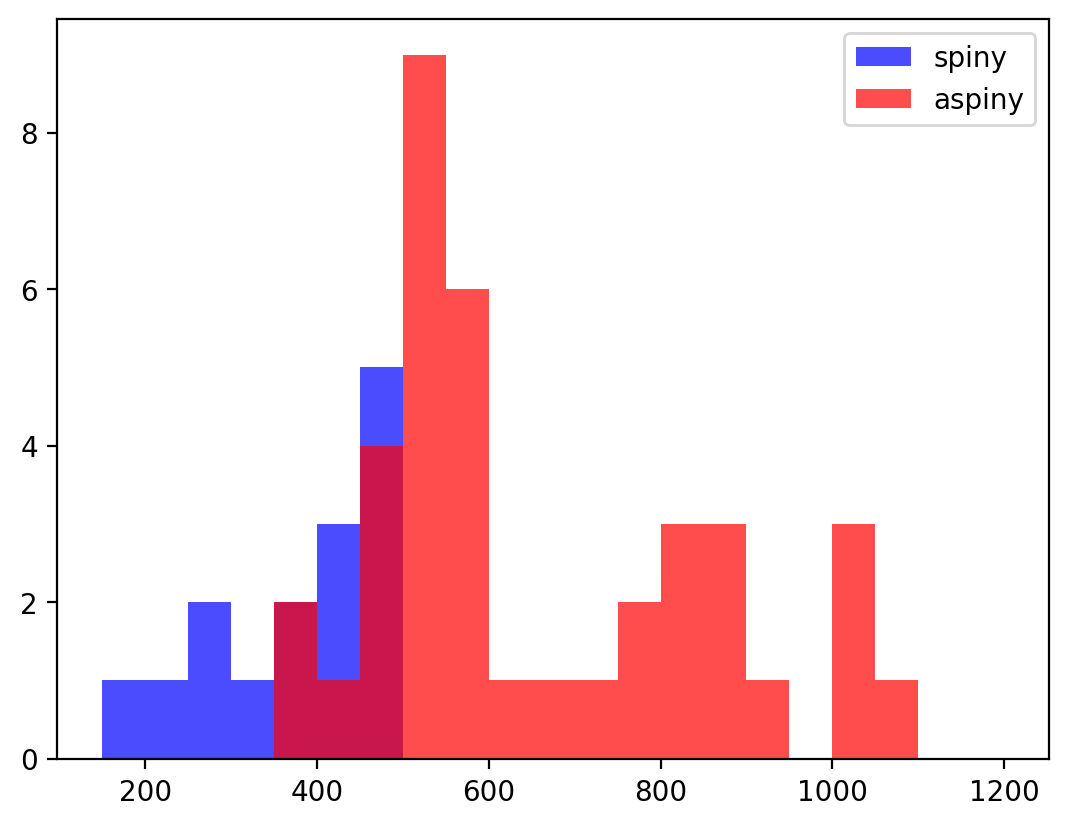

In [8]:
# find indices of spiny and aspiny neurons in table 
# since array index starts at 0 we're asking for column 5 for the spiny / aspiny indication rather than 6
spiny_yn = df.iloc[:, 5].to_numpy() 
spiny_bool = np.unique(spiny_yn)

# error check
if not np.all(np.isin(spiny_yn, ['spiny', 'aspiny'])): 
    ValueError("neither spiny nor aspiny")

spiny = np.where(spiny_yn == spiny_bool[0])[0]
aspiny = np.where(spiny_yn == spiny_bool[1])[0]
max_eucl_dist = df.iloc[:, 3].to_numpy()

# plot each using bins in increments of 50 
bins = np.arange(150, 1201, 50)
plt.figure()
plt.hist(max_eucl_dist[spiny], bins=bins, color='blue', alpha=0.7, label='spiny')
plt.hist(max_eucl_dist[aspiny], bins=bins, color='red', alpha=0.7, label='aspiny')
plt.legend() 

# Give you graph a title and axes labels
...

plt.show()


> **Task [10 points]:** Describe the shape of the two distributions using the language we've learnty in lecture. Are they unimodal? Symmetric? Negative or positively skewed? Based on the shape of these distributions, make a prediction about the relative location of the mean and median for each distribution. What about measures of variability - how do you think the two distributions compare? Write your answer by editing the markdown cell directly below this one.

**write your response here [100 - 150 words approx]**
...

##### **Calculate measures of central tendency and dispersion for distance** 

Now that we have our two distributions, let's calculate some statistics! Refer to the "Introduction to Statistics, part 2" notebook we complete in lecture, and the section titled __["measures of central tendency and variability"](https://colab.research.google.com/github/Kar1na2/NEURO201/blob/main/In-class%20Activities/Statistics%202%20-%20Measures%20of%20central%20tendency%20and%20dispersion-checkpoint.ipynb#scrollTo=_Measures_of_central_tendency_and_variability)__
<br>

Let's begin by calculating two measures of central tendency (mean & median)

> **Task [5 points]:** Below we have already calculated the mean distance for both spiny and aspiny neurons. We used the **mean** function (within the numpy library) and provided the variables "spiny_dist" and "aspiny_dist". Using the **median** function (also within the numpy library), find the median of the variables "spiny_max_dist" and "aspiny_max_dist". The variables to which the means should be assigned are already written in the code block below. Lastly, use the **print** function to display each value. One value has already been done for you (the mean distance for spiny neurons). Complete the other three.

In [15]:
# create new variables for the max distance for the two groups of neurons 
spiny_max_dist = max_eucl_dist[spiny]
aspiny_max_dist = max_eucl_dist[aspiny]

# find the mean and assign to the variables below 
mean_dist_spiny = np.mean(spiny_max_dist)
mean_dist_aspiny = np.mean(aspiny_max_dist)

# find the median and assign to the variables below
median_dist_spiny = ...
median_dist_aspiny = ...

# display each of the four values (the first one has been done for you already)
print("mean distance spiny =", mean_dist_spiny) 
...

mean distance spiny = 379.8822978715631


Ellipsis

Similarly, let's now calculate two measures of dispersion: the interquartile range and the standard deviation. 

> **Task [5 points]:** Below we have already provided the interquartile range for both spiny and aspiny neurons. Using the numpy functions that we've previously used, find the **standard deviation** of the variables "spiny_max_dist" and "aspiny_max_dist". The variables to which these should be assigned are already written in the code block below (just complete the right hand side of the equation). The first print statement have been provided for you already, fill in print statements for the remaining 3 variables.

In [14]:
# find the inter-quartile range and assign to the variables below 
spiny_q1, spiny_q3 = np.quantile(max_eucl_dist[spiny], [0.25, 0.75])
iqr_dist_spiny = spiny_q3 - spiny_q1

aspiny_q1, aspiny_q3 = np.quantile(max_eucl_dist[aspiny], [0.25, 0.75])
iqr_dist_aspiny = aspiny_q3 - aspiny_q1

# find the standard deviation and assign to the variables below 
std_dist_spiny = ...
std_dist_aspiny = ...

# display each of the four values (the first one has been done for you already)
print("iqr distance spiny =", iqr_dist_spiny)
...

iqr distance spiny = 162.62476816193396


Ellipsis

**Questions❓**

> **Task [10 points]:** Based on your analysis above, reflect on how spiny (excitatory) vs. aspiny (inhibitory) neurons compare in terms of how far they send their axons/dendrites away from their cell body. How do the overall distributions, measures of central tendency, and measures of dispersion for spiny vs. aspiny neurons compare with one another? Write your response to the above questions by editing the markdown cell below
<br>



**Write your answer here.**

### **Variable 2: Number of bifurcations**

##### **📊 Plot histogram of the distribution of number of bifurcations**

Let's now examine how excitatory (spiny) and inhibitory (aspiny) neurons differ in terms of the other morphological variable: the number of bifurcations

> **Task [3 points]:** Before running the code block below, where it says "Give your graph a title and axes labels", delete the "..." and write some code that adds labels the x-axis of your plot as “Number of bifurcations”, the y-axis as “Number of neurons”, and give your plot an a descriptive title. To remind yourself of the python commands for doing this, refer to the previous histogram plots we made in __[“Step 5: Vary the bin size” in Statistics 1 notebook](https://colab.research.google.com/github/Kar1na2/NEURO201/blob/main/In-class%20Activities/Statistics%201%20-%20Frequency%20tables%2C%20distributions%2C%20%26%20graphs.ipynb#scrollTo=_Step_5_Vary_the_Number_of_Bins)__
> 

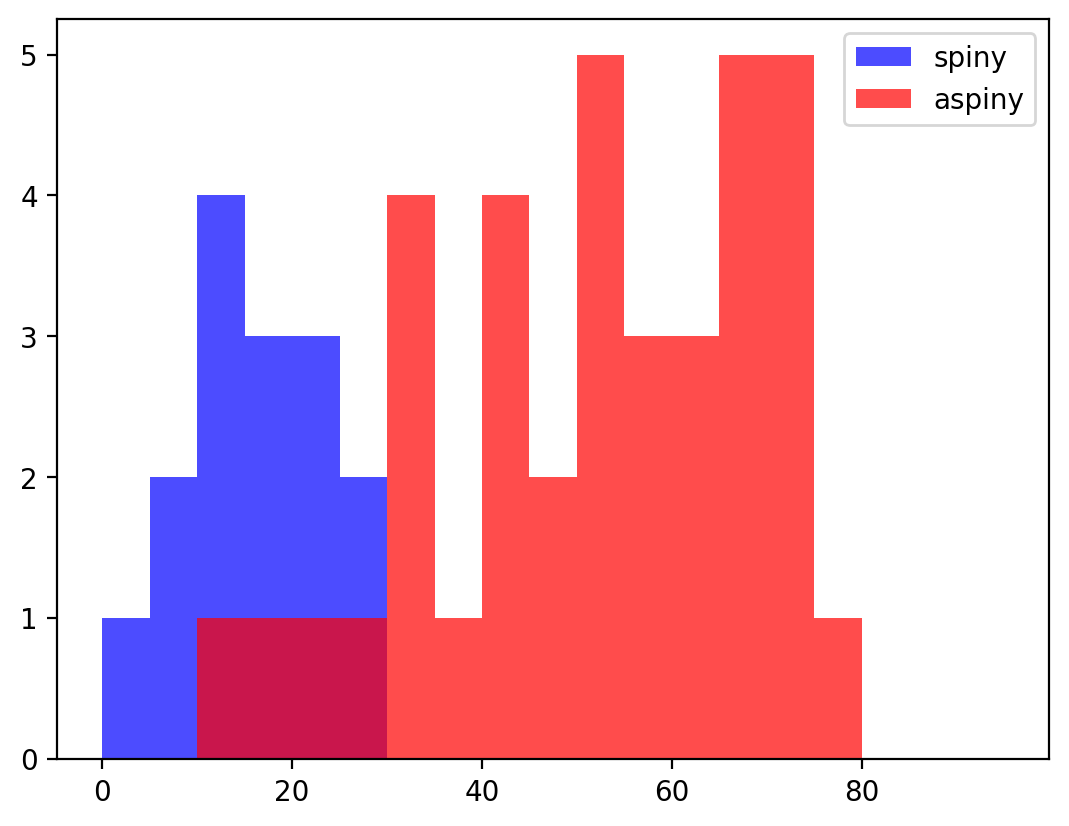

In [13]:
# find indices of spiny and aspiny neurons in table 
# since array index starts at 0 we're asking for column 5 for the spiny / aspiny indication rather than 6
# find indices of spiny and aspiny neurons in table 
# since array index starts at 0 we're asking for column 5 for the spiny / aspiny indication rather than 6
spiny_yn = df.iloc[:, 5].to_numpy() 
spiny_bool = np.unique(spiny_yn)

# error check
if not np.all(np.isin(spiny_yn, ['spiny', 'aspiny'])): 
    ValueError("neither spiny nor aspiny")

spiny = np.where(spiny_yn == spiny_bool[0])[0]
aspiny = np.where(spiny_yn == spiny_bool[1])[0]
nbifurc = df.iloc[:, 4].to_numpy()

# on the x-axis, set the range as [0 100] and use bins of 5.
bins = np.arange(0, 100, 5)
plt.figure()
plt.hist(nbifurc[spiny], bins=bins, color='blue', alpha=0.7, label='spiny')
plt.hist(nbifurc[aspiny], bins=bins, color='red', alpha=0.7, label='aspiny')
plt.legend() 


# Give you graph a title and axes labels
...

plt.show()

##### **Calculate measures of central tendency and dispersion for number of bifurcations**

Let’s now calculate descriptive statistics for this second morphological feature (the number of times a neuron’s axons/dendrites bifurcate). 

> **Task [12 points]:** Choose one measure of central tendency (either mean or median) and one measure of dispersion (either the inter-quartile range or standard deviation) to calculate for spiny and aspiny neurons. 

In [18]:
# create new variables for the number of bifurcation for the two groups of neurons 
nbifurc_spiny = nbifurc[spiny]
nbifurc_aspiny = nbifurc[aspiny]

# calculate your measure of central tendency here
...

# calculate your measure of dispersion here
...

# display your values here
...

Ellipsis


> **Task [10 points]:** Based on your analysis above, reflect on how spiny (excitatory) vs. aspiny (inhibitory) neurons compare in terms of the number of branches they tend to have in their axons/dendrites. How do the overall distributions, measures of central tendency, and measures of dispersion for spiny vs. aspiny neurons compare with one another? Write your response to the above questions by editing the markdown cell below
<br>


**write your response here [100 - 150 words approx]**


🎉 You’ve finished Assignment 1! Remember to save this completed notebook as a PDF file and upload to Canvas by the assignment due date.

**Techincal notes & credits** 

Much more information can be found in the __[Allen Brain Atlas whitepaper](http://help.brain-map.org/download/attachments/8323525/CellTypes_Ephys_Overview.pdf)__ as well as in their __[Github documentation](http://alleninstitute.github.io/AllenSDK/cell_types.html)__